In [ ]:
#Подключение google диска
#text
from google.colab import drive
drive.mount('/content/drive')

# Определение рабочей папки
%cd "/content/drive/MyDrive/Colab Notebooks/University project"

#Просмотр папки с помощью команды Ubuntu ls
!ls
#!cp
#!git clone 

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/University project
'1 task.ipynb'	 titanic.csv


In [ ]:
#Series

#установка пакета (библиотеки) pandas.
!pip install pandas
import pandas as pd

#серия - одномерный массив 
my_series = pd.Series([5, 6, 7, 8, 9, 10]) 
my_series

#Получить информацию об индексах
my_series.index

#Получить только значения
my_series.values

#Получить только значение для 5-ого элемента (нумерация с 0)
my_series[4]

#Задать индексы явно
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f']) 
my_series2['f'] 

#Выборка по нескольким индексам и групповое присваивание
my_series2[['a', 'b', 'f']]
my_series2[['a', 'b', 'f']] = 0
my_series2

#Фильтр Series и применение математических операций
my_series2[my_series2 > 0]
my_series2[my_series2 > 0] * 2

#Создание словаря
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3
'd' in my_series3

#задаём имя объекту и индексу через атрибут name
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

#Изменение индекса
my_series3.index = ['A', 'B', 'C', 'D']
my_series3


A    5
B    6
C    7
D    8
Name: numbers, dtype: int64

In [ ]:
#Dataframes

#Объявление фреймов
df = pd.DataFrame({
'country': ['Belgium', 'France', 'Belarus', 'Ukraine'],
'population': [17.04, 143.5, 9.5, 45.5],
'square': [2724902, 17125191, 207600, 603628]
})
df

#Просмотр фрейма по одному полю
df['country']
type(df['country'])
df.columns
df.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
#Доступ по индексу в DataFrame

#Задать индекс по строкам 
df = pd.DataFrame({
'country': ['Belgium', 'France', 'Belarus', 'Ukraine'],
'population': [17.04, 143.5, 9.5, 45.5],
'square': [2724902, 17125191, 207600, 603628]
}, index=['BE', 'FR', 'BY', 'UA'])
df
df.index = ['BE', 'FR', 'BY', 'UA']
df.index.name = 'Country Code'
df
df['country']

#Доступ к строкам по индексу
df.loc['BE']
df.iloc[0]

#Выборка по индексу и интересующим колонкам
df.loc[['BE', 'FR'], 'population']
df.loc['BE':'BY', :]

#Фильтр DataFrame с помощью булевых массивов
df[df.population > 10][['country', 'square']]

#Сбросить индексы
df.reset_index()

#Добавим новый столбец, в котором население (в миллионах) поделим на площадь страны, получив тем самым плотность
df['density'] = df['population'] / df['square'] * 1000000
df

#Удаление добавленного столбца
df.drop(['density'], axis='columns')

#Переименовать столбцы
df = df.rename(columns={'Country Code': 'country_code'})
df

,country,population,square,density
Country Code,,,,
BE,Belgium,17.04,2724902,6.253436
FR,France,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [ ]:
#Загрузка данных в фрейм из файла (путь к нему указали выше)
titanic_df = pd.read_csv('titanic.csv')
print(titanic_df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [ ]:
#подсчитать, сколько женщин и мужчин выжило, а сколько нет
print(titanic_df.groupby(['Sex', 'Survived'])['PassengerId'].count())


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


In [ ]:
#анализ в разрезе класса кабины
print(titanic_df.groupby(['Pclass', 'Survived'])['PassengerId'].count())



Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


In [ ]:
#сводные таблицы - посчитать сколько всего женщин и мужчин было в конкретном классе корабля
pvt = titanic_df.pivot_table(index='Sex', columns='Pclass', values='Name', aggfunc='count')
print(pvt)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


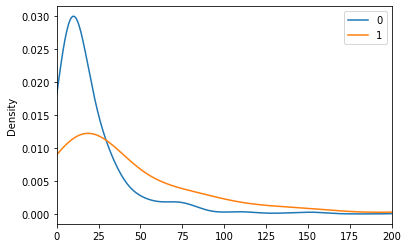

In [ ]:
#Визуализация данных в pandas
#Визуалиция зависимость выжившие на Титанике-цена билета
import matplotlib.pyplot as plt
titanic_df.groupby('Survived').Fare.plot.kde()
plt.xlim(0, 200)
plt.legend()

In [ ]:
#Загрузка тестовой выборки
from pandas import read_csv, DataFrame, Series
data = read_csv('titanic.csv') 
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


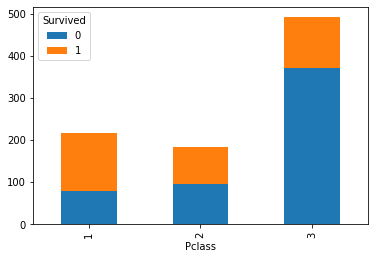

In [ ]:
#количество спасшихся и утонувших в разрезе классов
data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True) 

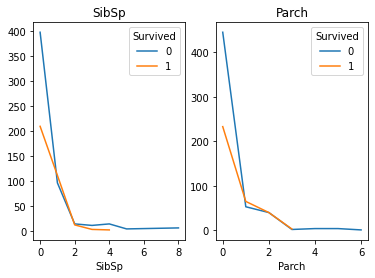

In [ ]:
#количество спасшихся и утонувших в зависимости от наличия родственников
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2)
data.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0],
title='SibSp')
data.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1],
title='Parch') 

In [ ]:
#проверка заполнения данными поля с номерами кают
data.PassengerId[data.Cabin.notnull()].count()


204

In [ ]:
#проверка заполнения данными поля со значениями возраста
data.PassengerId[data.Age.notnull()].count()


714

In [ ]:
#задаём полю с возрастом значение равное медиане по возрасту из всей выборки
data.Age = data.Age.median()


In [ ]:
#проверим есть ли такие пассажиры у которых порт посадки Embarked не указан 
data[data.Embarked.isnull()]




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#присвоение 2 пассажирам, у которых не указан порт посадки, порт в котором сделали посадку больше всего людей
MaxPassEmbarked = data.groupby('Embarked').count()['PassengerId']
data.Embarked[data.Embarked.isnull()] == MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]



Series([], Name: Embarked, dtype: bool)

In [ ]:
#проверка поля Fare на пустые значения
data.PassengerId[data.Fare.isnull()]

Series([], Name: PassengerId, dtype: int64)

In [ ]:
#удаление ненужных столбцов и получение выборки для анализа
# data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
#Индивидуальное задание № 3 - Определить количество одиноких пассажиров (без родственников) 
data['SibSp'].value_counts()
data[data.SibSp < 1].shape[0]


608